In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Kalkeseetharaman P K\Downloads\archive (1)\heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


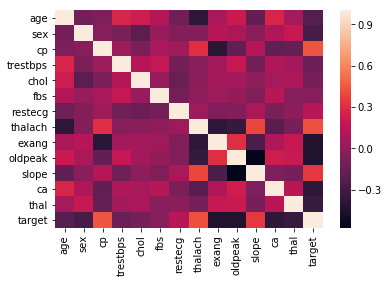

In [7]:
sns.heatmap(df.corr())

In [9]:
x = df.drop(['target'], axis=1)

In [11]:
x.values

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [12]:
y = df.iloc[:,13:].values

In [13]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=11,p = 1)

In [18]:
knn.fit(x_train,y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=1,
           weights='uniform')

In [20]:
y_pred = knn.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
accuracy_score(y_test,y_pred)

0.7640117994100295

In [23]:
confusion_matrix(y_test,y_pred)

array([[126,  45],
       [ 35, 133]], dtype=int64)

In [24]:
import sklearn.metrics as mt
fpr,tpr, threshold = mt.roc_curve(y_test,y_pred)
roc = mt.auc(fpr, tpr)
roc

0.7642543859649122

In [25]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
accuracy_score(y_test,y_pred)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7964601769911505

In [26]:
confusion_matrix(y_test,y_pred)

array([[128,  43],
       [ 26, 142]], dtype=int64)

In [27]:
fpr,tpr, threshold = mt.roc_curve(y_test,y_pred)
roc = mt.auc(fpr, tpr)
roc

0.7968880534670008

In [28]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
accuracy_score(y_test,y_pred)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.976401179941003

In [29]:
confusion_matrix(y_test,y_pred)

array([[163,   8],
       [  0, 168]], dtype=int64)

In [30]:
fpr,tpr, threshold = mt.roc_curve(y_test,y_pred)
roc = mt.auc(fpr, tpr)
roc

0.9766081871345029